In [1]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
os.listdir(hybrid_directory)

['lr0.001_epoch17_m3rg-iitd_matscibert_threshold0.5_MAX_LEN128_BATCH_SIZE32_KERNEL_SIZES[3, 4, 5]_NUM_FILTERS100.txt',
 'lr0.001_epoch18_allenai_scibert_scivocab_uncased_threshold0.5_MAX_LEN128_BATCH_SIZE32_KERNEL_SIZES[3, 4, 5]_NUM_FILTERS100.txt',
 'lr0.001_epoch18_bert-base-uncased_threshold0.5_MAX_LEN128_BATCH_SIZE32_KERNEL_SIZES[3, 4, 5]_NUM_FILTERS100.txt',
 'lr0.001_epoch18_matbert-base-uncased_threshold0.5_MAX_LEN128_BATCH_SIZE32_KERNEL_SIZES[3, 4, 5]_NUM_FILTERS100.txt',
 'lr0.001_epoch22_pranav-s_MaterialsBERT_threshold0.5_MAX_LEN128_BATCH_SIZE32_KERNEL_SIZES[3, 4, 5]_NUM_FILTERS100.txt',
 'lr0.001_epoch23_bert-base-cased_threshold0.5_MAX_LEN128_BATCH_SIZE32_KERNEL_SIZES[3, 4, 5]_NUM_FILTERS100.txt',
 'lr0.001_epoch27_allenai_scibert_scivocab_cased_threshold0.5_MAX_LEN128_BATCH_SIZE32_KERNEL_SIZES[3, 4, 5]_NUM_FILTERS100.txt',
 'lr0.001_epoch27_matbert-base-cased_threshold0.5_MAX_LEN128_BATCH_SIZE32_KERNEL_SIZES[3, 4, 5]_NUM_FILTERS100.txt']

## Hybrid 토크나이저 시도해본거 전체 test metric 총집합 평균 표준편차

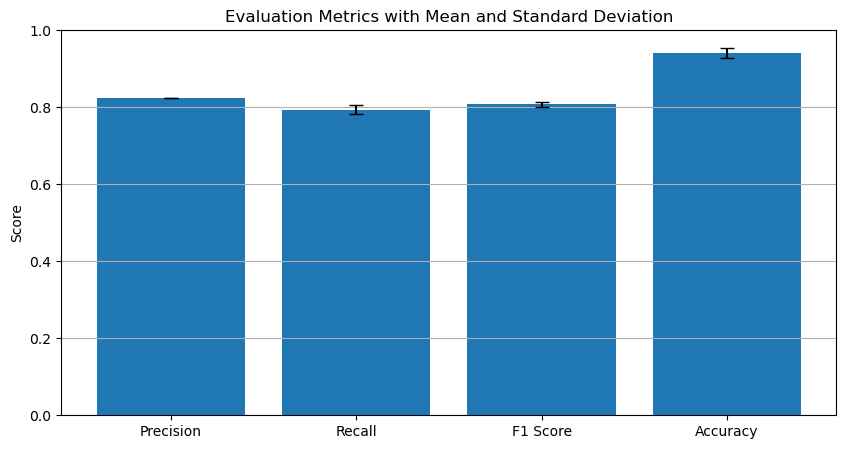

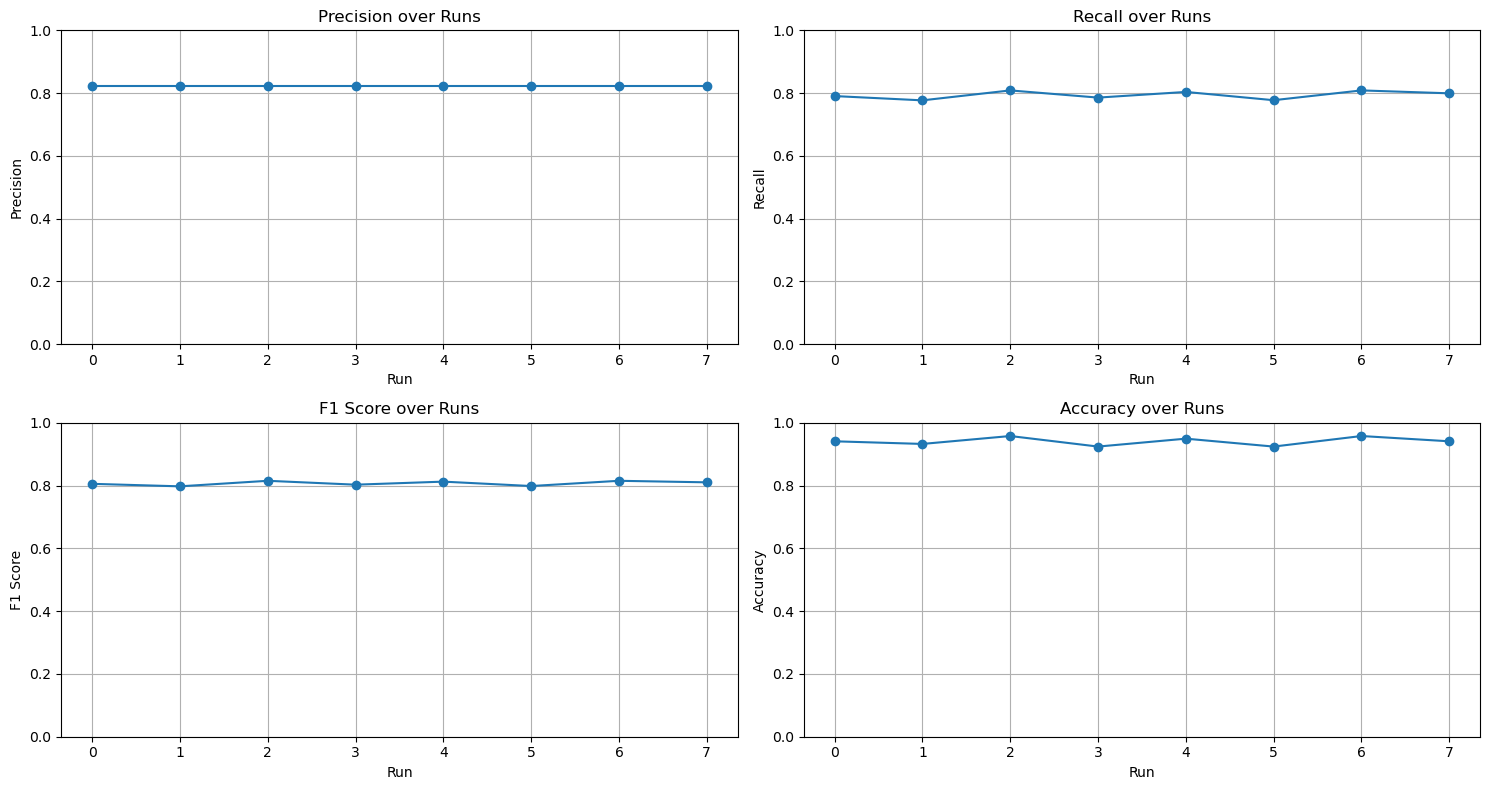

In [11]:

MODEL_NAME = "HYBRID"
hybrid_directory = "../../06-1processResults/best_tokenizer/test_results/Hybrid/"
datas = []
for txt_name in os.listdir(hybrid_directory):
  with open(hybrid_directory+txt_name, "r") as f:
    txt = f.read()
    datas.append(txt)
Precision_list = []
Recall_list = []
F1_list = []
Accuracy_list = []
for data in datas:
  data = data.split("\n")[:4]
  Precision = float(data[0][data[0].find(": ")+2:].strip())
  Recall = float(data[1][data[1].find(": ")+2:].strip())
  F1 = float(data[2][data[2].find(": ")+2:].strip())
  Accuracy = float(data[3][data[3].find(": ")+2:].strip())
  Precision_list.append(Precision)
  Recall_list.append(Recall)
  F1_list.append(F1)
  Accuracy_list.append(Accuracy)
# 평균 및 표준 편차 계산
precision_mean = sum(Precision_list) / len(Precision_list)
recall_mean = sum(Recall_list) / len(Recall_list)
f1_mean = sum(F1_list) / len(F1_list)
accuracy_mean = sum(Accuracy_list) / len(Accuracy_list)

precision_std = (sum([(x - precision_mean) ** 2 for x in Precision_list]) / len(Precision_list)) ** 0.5
recall_std = (sum([(x - recall_mean) ** 2 for x in Recall_list]) / len(Recall_list)) ** 0.5
f1_std = (sum([(x - f1_mean) ** 2 for x in F1_list]) / len(F1_list)) ** 0.5
accuracy_std = (sum([(x - accuracy_mean) ** 2 for x in Accuracy_list]) / len(Accuracy_list)) ** 0.5

# 플롯
metrics = ['Precision', 'Recall', 'F1 Score', 'Accuracy']
means = [precision_mean, recall_mean, f1_mean, accuracy_mean]
stds = [precision_std, recall_std, f1_std, accuracy_std]

plt.figure(figsize=(10, 5))
plt.bar(metrics, means, yerr=stds, capsize=5)
plt.ylabel('Score')
plt.ylim(0, 1)
plt.title('Evaluation Metrics with Mean and Standard Deviation')
plt.grid(axis='y')

# 결과 저장
plot_directory = 'plots'
if not os.path.exists(plot_directory):
    os.makedirs(plot_directory)
plt.savefig(os.path.join(plot_directory, MODEL_NAME+'토크나이저들_메트릭_평균_표준편차.png'))
plt.show()

# 각 메트릭의 시계열 플롯
plt.figure(figsize=(15, 8))
plt.subplot(2, 2, 1)
plt.plot(Precision_list, label='Precision', marker='o')
plt.title('Precision over Runs')
plt.xlabel('Run')
plt.ylabel('Precision')
plt.grid()
plt.ylim(0, 1)

plt.subplot(2, 2, 2)
plt.plot(Recall_list, label='Recall', marker='o')
plt.title('Recall over Runs')
plt.xlabel('Run')
plt.ylabel('Recall')
plt.grid()
plt.ylim(0, 1)

plt.subplot(2, 2, 3)
plt.plot(F1_list, label='F1 Score', marker='o')
plt.title('F1 Score over Runs')
plt.xlabel('Run')
plt.ylabel('F1 Score')
plt.grid()
plt.ylim(0, 1)

plt.subplot(2, 2, 4)
plt.plot(Accuracy_list, label='Accuracy', marker='o')
plt.title('Accuracy over Runs')
plt.xlabel('Run')
plt.ylabel('Accuracy')
plt.grid()
plt.ylim(0, 1)

plt.tight_layout()
plt.savefig(os.path.join(plot_directory, MODEL_NAME+'metrics_over_runs.png'))
plt.show()

## Word 토크나이저 시도해본거 전체 test metric 총집합 평균 표준편차

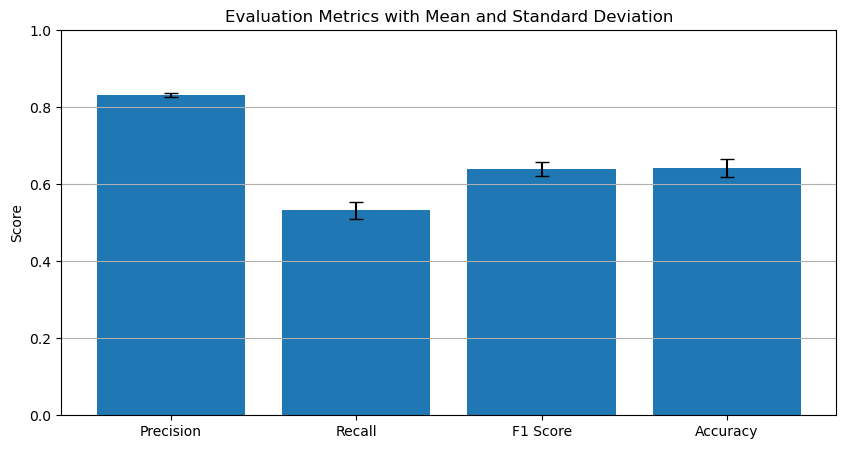

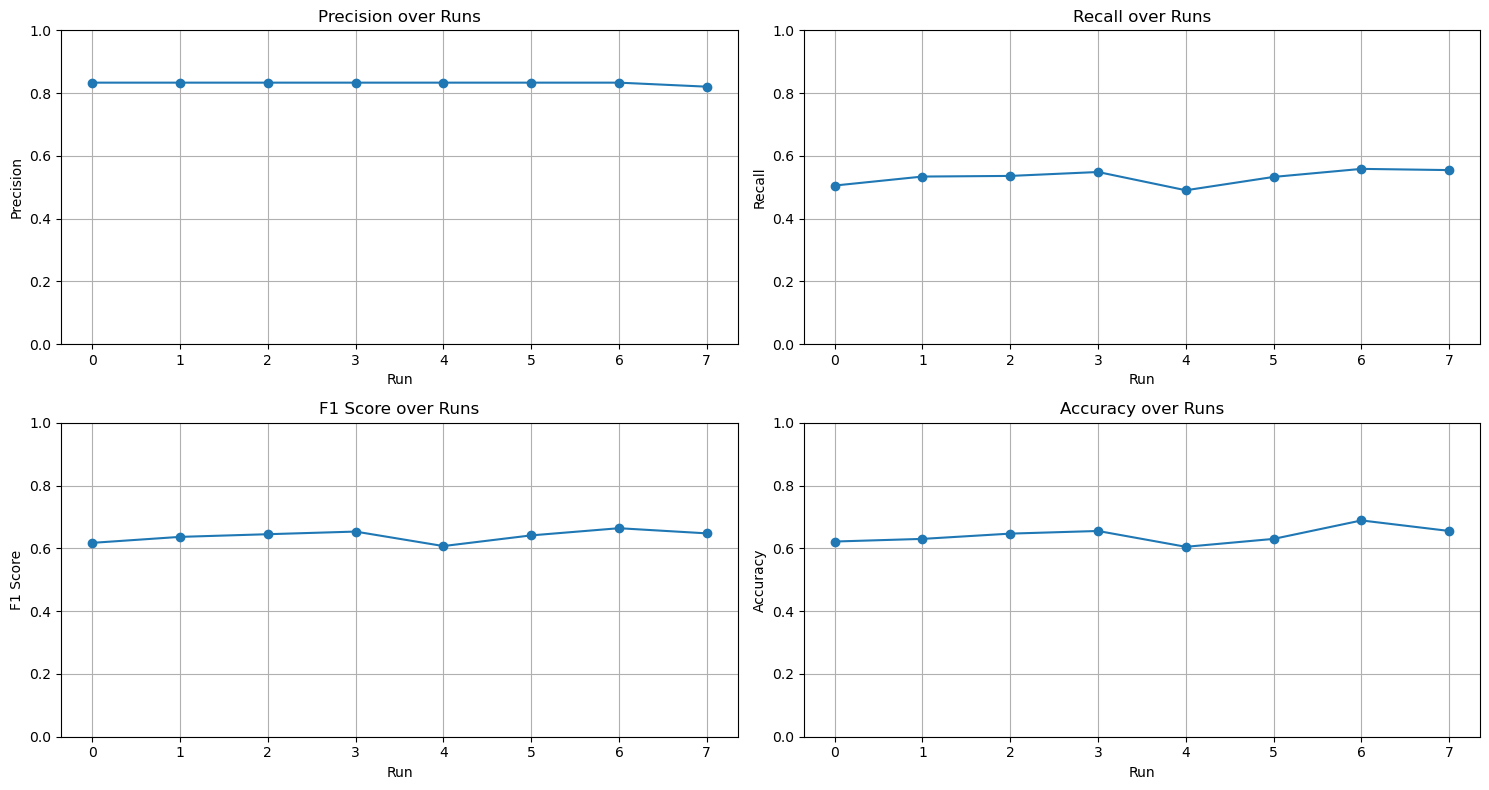

In [13]:

MODEL_NAME = "Word"
word_directory = "../../06-1processResults/best_tokenizer/test_results/Word/"
datas = []
for txt_name in os.listdir(word_directory):
  with open(word_directory+txt_name, "r") as f:
    txt = f.read()
    datas.append(txt)
Precision_list = []
Recall_list = []
F1_list = []
Accuracy_list = []
for data in datas:
  data = data.split("\n")[:4]
  Precision = float(data[0][data[0].find(": ")+2:].strip())
  Recall = float(data[1][data[1].find(": ")+2:].strip())
  F1 = float(data[2][data[2].find(": ")+2:].strip())
  Accuracy = float(data[3][data[3].find(": ")+2:].strip())
  Precision_list.append(Precision)
  Recall_list.append(Recall)
  F1_list.append(F1)
  Accuracy_list.append(Accuracy)
# 평균 및 표준 편차 계산
precision_mean = sum(Precision_list) / len(Precision_list)
recall_mean = sum(Recall_list) / len(Recall_list)
f1_mean = sum(F1_list) / len(F1_list)
accuracy_mean = sum(Accuracy_list) / len(Accuracy_list)

precision_std = (sum([(x - precision_mean) ** 2 for x in Precision_list]) / len(Precision_list)) ** 0.5
recall_std = (sum([(x - recall_mean) ** 2 for x in Recall_list]) / len(Recall_list)) ** 0.5
f1_std = (sum([(x - f1_mean) ** 2 for x in F1_list]) / len(F1_list)) ** 0.5
accuracy_std = (sum([(x - accuracy_mean) ** 2 for x in Accuracy_list]) / len(Accuracy_list)) ** 0.5

# 플롯
metrics = ['Precision', 'Recall', 'F1 Score', 'Accuracy']
means = [precision_mean, recall_mean, f1_mean, accuracy_mean]
stds = [precision_std, recall_std, f1_std, accuracy_std]

plt.figure(figsize=(10, 5))
plt.bar(metrics, means, yerr=stds, capsize=5)
plt.ylabel('Score')
plt.ylim(0, 1)
plt.title('Evaluation Metrics with Mean and Standard Deviation')
plt.grid(axis='y')

# 결과 저장
plot_directory = 'plots'
if not os.path.exists(plot_directory):
    os.makedirs(plot_directory)
plt.savefig(os.path.join(plot_directory, MODEL_NAME+'토크나이저들_메트릭_평균_표준편차.png'))
plt.show()

# 각 메트릭의 시계열 플롯
plt.figure(figsize=(15, 8))
plt.subplot(2, 2, 1)
plt.plot(Precision_list, label='Precision', marker='o')
plt.title('Precision over Runs')
plt.xlabel('Run')
plt.ylabel('Precision')
plt.grid()
plt.ylim(0, 1)

plt.subplot(2, 2, 2)
plt.plot(Recall_list, label='Recall', marker='o')
plt.title('Recall over Runs')
plt.xlabel('Run')
plt.ylabel('Recall')
plt.grid()
plt.ylim(0, 1)

plt.subplot(2, 2, 3)
plt.plot(F1_list, label='F1 Score', marker='o')
plt.title('F1 Score over Runs')
plt.xlabel('Run')
plt.ylabel('F1 Score')
plt.grid()
plt.ylim(0, 1)

plt.subplot(2, 2, 4)
plt.plot(Accuracy_list, label='Accuracy', marker='o')
plt.title('Accuracy over Runs')
plt.xlabel('Run')
plt.ylabel('Accuracy')
plt.grid()
plt.ylim(0, 1)

plt.tight_layout()
plt.savefig(os.path.join(plot_directory, MODEL_NAME+'metrics_over_runs.png'))
plt.show()

## 종합 시각화

### 하이브리드

In [43]:
import os
import matplotlib.pyplot as plt

MODEL_NAME = "HYBRID"
hybrid_directory = "../../06-1processResults/best_tokenizer/test_results/Hybrid/"
datas = []
tokenizers = []

# 파일에서 데이터 읽기
for txt_name in os.listdir(hybrid_directory):
    with open(hybrid_directory + txt_name, "r") as f:
        txt = f.read()
        datas.append(txt)
tokenizers = [
    "matscibert",
    "MaterialsBERT",
    "bert-base-uncased",
    "scibert_uncased",
    "matbert-base-uncased",
    "bert-base-cased",
    "scibert_cased",
    "matbert-base-cased"
]
# Metric lists
Precision_list = []
Recall_list = []
F1_list = []
Accuracy_list = []

# 데이터 파싱
for data in datas:
    data = data.split("\n")[:4]
    Precision = float(data[0][data[0].find(": ") + 2:].strip())
    Recall = float(data[1][data[1].find(": ") + 2:].strip())
    F1 = float(data[2][data[2].find(": ") + 2:].strip())
    Accuracy = float(data[3][data[3].find(": ") + 2:].strip())


    Precision_list.append(Precision)
    Recall_list.append(Recall)
    F1_list.append(F1)
    Accuracy_list.append(Accuracy)

# Plot directory
plot_directory = 'plots'
if not os.path.exists(plot_directory):
    os.makedirs(plot_directory)

# Metrics bar plot
metrics = ['Precision', 'Recall', 'F1 Score', 'Accuracy']
lists = [Precision_list, Recall_list, F1_list, Accuracy_list]

colors = ['b', 'g', 'orange', 'r', 'm', 'y', 'k', 'c']

# Create individual plots for each metric
for i, (metric, values) in enumerate(zip(metrics, lists)):
    plt.figure(figsize=(12, 8))
    plt.bar(tokenizers, values, color=colors[:len(tokenizers)])
    plt.title(f'{metric} Comparison Across Tokenizers', fontsize=25)
    plt.ylim(0, 1)
    plt.xticks(rotation=45, ha='right', fontsize=15)
    # for j, val in enumerate(values):
    #     plt.text(j, val + 0.01, f'{val:.2f}', ha='center', va='bottom')
    # plt.ylabel(metric)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.savefig(os.path.join(plot_directory, MODEL_NAME + f'_{metric}_comparison.png'))
    plt.close()


### Word 

In [44]:
import os
import matplotlib.pyplot as plt

MODEL_NAME = "WORD"
word_directory = "../../06-1processResults/best_tokenizer/test_results/Word/"
datas = []
tokenizers = []

# 파일에서 데이터 읽기
for txt_name in os.listdir(word_directory):
    with open(word_directory + txt_name, "r") as f:
        txt = f.read()
        datas.append(txt)
tokenizers = [
    "matscibert",
    "MaterialsBERT",
    "bert-base-uncased",
    "scibert_uncased",
    "matbert-base-uncased",
    "bert-base-cased",
    "scibert_cased",
    "matbert-base-cased"
]
# Metric lists
Precision_list = []
Recall_list = []
F1_list = []
Accuracy_list = []

# 데이터 파싱
for data in datas:
    data = data.split("\n")[:4]
    Precision = float(data[0][data[0].find(": ") + 2:].strip())
    Recall = float(data[1][data[1].find(": ") + 2:].strip())
    F1 = float(data[2][data[2].find(": ") + 2:].strip())
    Accuracy = float(data[3][data[3].find(": ") + 2:].strip())


    Precision_list.append(Precision)
    Recall_list.append(Recall)
    F1_list.append(F1)
    Accuracy_list.append(Accuracy)

# Plot directory
plot_directory = 'plots'
if not os.path.exists(plot_directory):
    os.makedirs(plot_directory)

# Metrics bar plot
metrics = ['Precision', 'Recall', 'F1 Score', 'Accuracy']
lists = [Precision_list, Recall_list, F1_list, Accuracy_list]

colors = ['b', 'g', 'orange', 'r', 'm', 'y', 'k', 'c']

# Create individual plots for each metric
for i, (metric, values) in enumerate(zip(metrics, lists)):
    plt.figure(figsize=(12, 8))
    plt.bar(tokenizers, values, color=colors[:len(tokenizers)])
    plt.title(f'{metric} Comparison Across Tokenizers', fontsize=25)
    plt.ylim(0, 1)
    plt.xticks(rotation=45, ha='right', fontsize=15)
    # for j, val in enumerate(values):
    #     plt.text(j, val + 0.01, f'{val:.2f}', ha='center', va='bottom')
    plt.ylabel(metric)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.savefig(os.path.join(plot_directory, MODEL_NAME + f'_{metric}_comparison.png'))
    plt.close()
